In [1]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scvelo as scv

In [2]:
# load matrix
X = io.mmread("Brca_081720_T_counts.mtx")

# create anndata object
adata = anndata.AnnData(
    X=X.transpose().tocsr()
)

# load metadata
cell_meta = pd.read_csv("Brca_081720_T_metadata.csv", low_memory=False)

# load gene names
with open("Brca_081720_T_gene_names.csv", 'r') as f:
    gene_names = f.read().splitlines()

# set anndata observations and index obs by barcodes, var by gene names
adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names

# load PCA dimensional reduction
pca = pd.read_csv("Brca_081720_T_PCA.csv")
pca.index = adata.obs.index

# set pca and umap for the anndata object
adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T

... storing 'orig.ident' as categorical
... storing 'Phase' as categorical
... storing 'Cell.type' as categorical


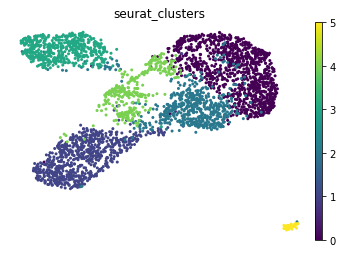

In [3]:
# plot the UMAP colored by cluster to test:
sc.pl.umap(adata, color=['seurat_clusters'], frameon=False)

In [4]:
adata.obs.index.name = "cells"

In [5]:
loom1 = scv.read('Brca_081720_T.loom', cache=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
loom1.obs

,Clusters,_X,_Y
CellID,,,
Brca_081720_T:AAATGGCCAAATGCCCx,10,-7.462475,-41.358231
Brca_081720_T:AAACCGCGTTGTAACGx,4,8.962390,-41.204277
Brca_081720_T:AACAGATAGTAAACCCx,3,10.372833,31.246939
Brca_081720_T:AACAGCAAGGCCGGAAx,6,22.793766,32.557644
Brca_081720_T:AAACGTACATCATGGCx,2,31.903675,-28.690233
...,...,...,...
Brca_081720_T:TTTGTGTTCCGGTATGx,8,34.287819,7.564888
Brca_081720_T:TTTGTGAAGTTAGTTGx,3,-2.091159,27.958111
Brca_081720_T:TTTGTGTTCTCACACCx,0,-0.349463,6.450787


In [7]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.4,seurat_clusters,SCT_snn_res.0.3,S.Score,...,Phase,old.ident,SCT_snn_res.0.25,SCT_snn_res.0.2,Cell.type,SCT_snn_res.0.5,SCT_snn_res.0.35,barcode,UMAP_1,UMAP_2
cells,,,,,,,,,,,,,,,,,,,,,
AAACCAACAGCTTAAT-1,SeuratProject,6186,2555,8.001940,5994,2552,3,3,3,-0.064365,...,G1,4,3,3,Luminal-like,3,3,AAACCAACAGCTTAAT-1,-3.304968,3.508299
AAACCAACATTAGCCA-1,SeuratProject,5275,2162,15.488152,5451,2161,3,3,3,-0.050685,...,G1,4,3,3,Luminal-like,3,3,AAACCAACATTAGCCA-1,-4.709204,3.637213
AAACCGAAGCACAGCC-1,SeuratProject,8799,3273,8.250938,6418,3251,0,1,2,-0.020778,...,G1,2,1,1,Basal-like,0,1,AAACCGAAGCACAGCC-1,-4.219562,-5.856325
AAACCGAAGGACAACA-1,SeuratProject,7518,2675,8.752328,6323,2672,1,0,0,-0.080094,...,G1,1,0,0,Luminal-like,2,0,AAACCGAAGGACAACA-1,4.773590,2.875857
AAACCGAAGGTTTGAC-1,SeuratProject,8289,2853,19.435396,6332,2841,1,0,0,-0.068716,...,G1,1,0,0,Luminal-like,2,0,AAACCGAAGGTTTGAC-1,3.941332,3.797874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGCAGGTTT-1,SeuratProject,4342,2081,3.892216,5090,2081,3,3,3,-0.116049,...,G1,4,3,3,Luminal-like,3,3,TTTGTGAAGCAGGTTT-1,-5.758597,3.963894
TTTGTGAAGTCACGAT-1,SeuratProject,4279,1784,5.141388,5139,1783,2,2,1,-0.040316,...,G1,0,0,0,Luminal-like,1,2,TTTGTGAAGTCACGAT-1,2.927949,-0.600327
TTTGTGTTCCGGTATG-1,SeuratProject,4872,2100,8.990148,5271,2098,2,2,1,-0.089113,...,G1,0,0,0,Luminal-like,1,2,TTTGTGTTCCGGTATG-1,1.785434,-1.624932


In [8]:
# make barcodes match between adata and loom file
barcodes = [bc.replace('Brca_081720_T:',"") for bc in loom1.obs.index.tolist()]
barcodes = [bc.replace('x',"-1") for bc in barcodes]
loom1.obs.index = barcodes

In [9]:
loom1.obs

,Clusters,_X,_Y
AAATGGCCAAATGCCC-1,10,-7.462475,-41.358231
AAACCGCGTTGTAACG-1,4,8.962390,-41.204277
AACAGATAGTAAACCC-1,3,10.372833,31.246939
AACAGCAAGGCCGGAA-1,6,22.793766,32.557644
AAACGTACATCATGGC-1,2,31.903675,-28.690233
...,...,...,...
TTTGTGTTCCGGTATG-1,8,34.287819,7.564888
TTTGTGAAGTTAGTTG-1,3,-2.091159,27.958111
TTTGTGTTCTCACACC-1,0,-0.349463,6.450787
TTTGTGGCAGCTAATT-1,5,5.681087,5.726679


In [10]:
loom1.var_names_make_unique()

In [11]:
# when there are more than one loom files, combine them:
#ldata = loom1.concatenate([loom2,loom3])

In [12]:
# merge the loom into adata
adata = scv.utils.merge(adata, loom1)

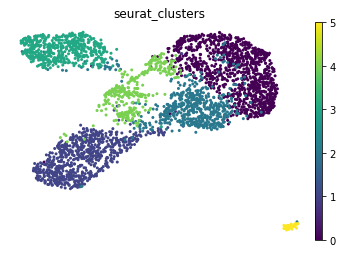

AnnData object with n_obs × n_vars = 3338 × 32245
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.4', 'seurat_clusters', 'SCT_snn_res.0.3', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'SCT_snn_res.0.25', 'SCT_snn_res.0.2', 'Cell.type', 'SCT_snn_res.0.5', 'SCT_snn_res.0.35', 'barcode', 'UMAP_1', 'UMAP_2', 'Clusters', '_X', '_Y', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_pca', 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [13]:
#confirm again
sc.pl.umap(adata, color='seurat_clusters', frameon=False)
adata

In [14]:
# save
adata.write('Brca_081720_T_adata_scvelo.h5ad')

# reload later
#adata = sc.read_h5ad('Brca_081720_T_adata_scvelo.h5ad')

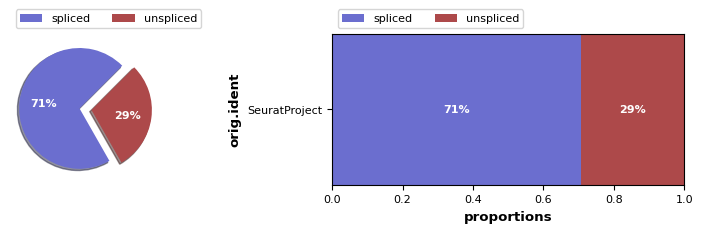

In [15]:
scv.pl.proportions(adata, groupby='orig.ident')

Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:00:21) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:09) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:20) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


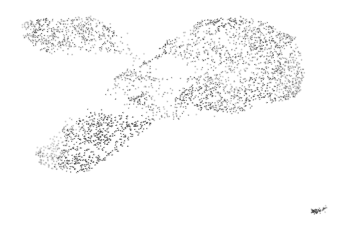

In [16]:
# do stochastic part first
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)

scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)

scv.pl.velocity_embedding(adata, basis='umap', frameon=False)

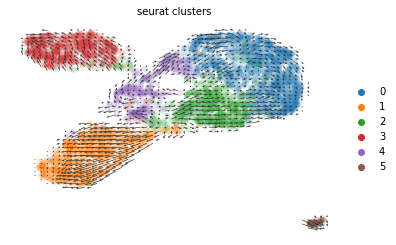

In [17]:
scv.pl.velocity_embedding_grid(adata, basis='umap', color='seurat_clusters', scale=0.25, legend_loc="right margin")

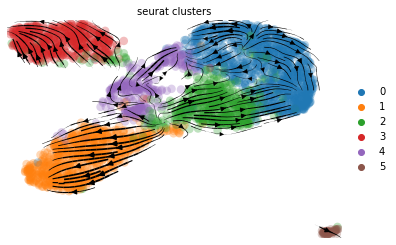

In [18]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['seurat_clusters'], legend_loc="right margin")

In [19]:
# continue the rest of tutorial